# Import required Libraries

In [4]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import pandas as pd
import os

# Set the environments

In [5]:
%matplotlib inline

In [6]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load the Files

In [12]:
deg0_files = []
deg90_files = []
deg180_files = []


directory = r'/Users/wasifaahmed/Documents/sound/Dataset/0_Deg/'
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        deg0_files.append(os.path.join(directory, filename))
    else:
        continue
        
directory = r'/Users/wasifaahmed/Documents/sound/Dataset/90_Deg/'
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        deg90_files.append(os.path.join(directory, filename))
    else:
        continue
        
directory = r'/Users/wasifaahmed/Documents/sound/Dataset/180_Deg/'
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        deg180_files.append(os.path.join(directory, filename))
    else:
        continue
        

## Helper Methods

In [24]:
# Normalising the spectral centroid
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

## Prepare a training Dataset with Spectral Centroid

In [25]:
all_spectral_centroids=[]

for audio_file in deg0_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    nx=normalize(spectral_centroids)
    if len(nx)==216:
        spectral_centroids_x = list(nx)
        spectral_centroids_x.append(0)
        all_spectral_centroids.append(spectral_centroids_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)
    
for audio_file in deg90_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    nx=normalize(spectral_centroids)
    if len(nx)==216:
        spectral_centroids_x = list(nx)
        spectral_centroids_x.append(1)
        all_spectral_centroids.append(spectral_centroids_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)


for audio_file in deg180_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    nx=normalize(spectral_centroids)
    if len(nx)==216:
        spectral_centroids_x = list(nx)
        spectral_centroids_x.append(2)
        all_spectral_centroids.append(spectral_centroids_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)

Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/391 (2).wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/389.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/410.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/411.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/388.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/413.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/407.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/412.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/416.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/417.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/415.wav
Error in file len

In [16]:
columns=[]
for i in range(216):
    columns.append("SC"+str(i))
columns.append("SOURCE")

df_sc = pd.DataFrame(columns=columns, data=all_spectral_centroids)

In [17]:
df_sc.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,SC7,SC8,SC9,SC10,SC11,SC12,SC13,SC14,SC15,SC16,SC17,SC18,SC19,SC20,SC21,SC22,SC23,SC24,SC25,SC26,SC27,SC28,SC29,SC30,SC31,SC32,SC33,SC34,SC35,SC36,SC37,SC38,SC39,SC40,SC41,SC42,SC43,SC44,SC45,SC46,SC47,SC48,SC49,SC50,SC51,SC52,SC53,SC54,SC55,SC56,SC57,SC58,SC59,SC60,SC61,SC62,SC63,SC64,SC65,SC66,SC67,SC68,SC69,SC70,SC71,SC72,SC73,SC74,SC75,SC76,SC77,SC78,SC79,SC80,SC81,SC82,SC83,SC84,SC85,SC86,SC87,SC88,SC89,SC90,SC91,SC92,SC93,SC94,SC95,SC96,SC97,SC98,SC99,SC100,SC101,SC102,SC103,SC104,SC105,SC106,SC107,SC108,SC109,SC110,SC111,SC112,SC113,SC114,SC115,SC116,SC117,SC118,SC119,SC120,SC121,SC122,SC123,SC124,SC125,SC126,SC127,SC128,SC129,SC130,SC131,SC132,SC133,SC134,SC135,SC136,SC137,SC138,SC139,SC140,SC141,SC142,SC143,SC144,SC145,SC146,SC147,SC148,SC149,SC150,SC151,SC152,SC153,SC154,SC155,SC156,SC157,SC158,SC159,SC160,SC161,SC162,SC163,SC164,SC165,SC166,SC167,SC168,SC169,SC170,SC171,SC172,SC173,SC174,SC175,SC176,SC177,SC178,SC179,SC180,SC181,SC182,SC183,SC184,SC185,SC186,SC187,SC188,SC189,SC190,SC191,SC192,SC193,SC194,SC195,SC196,SC197,SC198,SC199,SC200,SC201,SC202,SC203,SC204,SC205,SC206,SC207,SC208,SC209,SC210,SC211,SC212,SC213,SC214,SC215,SOURCE
0,0.932762,0.955020,0.960288,1.000000,0.954787,0.898651,0.965310,0.975670,0.915079,0.880594,0.722632,0.500143,0.430063,0.436984,0.341034,0.241771,0.351351,0.377463,0.421551,0.542441,0.485258,0.532998,0.549770,0.476152,0.363305,0.317009,0.286926,0.335009,0.346862,0.297795,0.286617,0.226205,0.191474,0.199757,0.209643,0.204405,0.190333,0.200489,0.241927,0.182645,0.182034,0.230906,0.233176,0.177540,0.173559,0.171621,0.159322,0.173168,0.124754,0.085124,0.101070,0.120010,0.246856,0.192748,0.153867,0.145329,0.099795,0.071969,0.193161,0.209152,0.146724,0.170299,0.212549,0.248546,0.262666,0.229286,0.244050,0.302978,0.271409,0.235273,0.268136,0.329393,0.340091,0.320793,0.284642,0.307654,0.295826,0.306137,0.341343,0.369924,0.307245,0.344181,0.336243,0.330508,0.291490,0.339342,0.310275,0.273684,0.301408,0.302249,0.344121,0.311429,0.336033,0.336272,0.301268,0.302750,0.313539,0.277503,0.298273,0.322019,0.325816,0.310032,0.344618,0.317517,0.341123,0.374028,0.347831,0.328593,0.361409,0.380090,0.367437,0.356348,0.332965,0.324108,0.295589,0.345024,0.332432,0.334366,0.327578,0.321271,0.332186,0.329102,0.305619,0.342904,0.342956,0.334029,0.328067,0.324835,0.324173,0.348111,0.363141,0.307236,0.361117,0.380565,0.296412,0.252797,0.253124,0.258697,0.273203,0.329089,0.294260,0.285727,0.338897,0.317112,0.303495,0.233566,0.257244,0.279489,0.328647,0.329973,0.305093,0.265151,0.333505,0.327684,0.281602,0.299347,0.299860,0.268478,0.310137,0.360506,0.308116,0.290177,0.278868,0.231284,0.239949,0.318541,0.344947,0.324366,0.254205,0.269153,0.257985,0.282274,0.318458,0.297123,0.321807,0.318179,0.268929,0.264911,0.292831,0.334945,0.294254,0.285810,0.304599,0.276180,0.282361,0.315570,0.323824,0.336917,0.303065,0.335698,0.333027,0.329841,0.326998,0.343368,0.303994,0.308663,0.312689,0.300081,0.279370,0.308096,0.307420,0.299613,0.296851,0.284619,0.311228,0.296742,0.278036,0.289271,0.313516,0.328330,0.337203,0.387075,0.372038,0.338193,0.279343,0.000000,0
1,0.838961,0.927353,0.929125,0.895558,0.993400,1.000000,0.949116,0.858599,0.943271,0.999471,0.965121,0.821826,0.544335,0.484795,0.351015,0.224684,0.322468,0.336376,0.213428,0.265882,0.419658,0.459711,0.521240,0.544714,0.475782,0.402243,0.531902,0.581477,0.535509,0.458114,0.356956,0.275807,0.332248,0.337796,0.342304,0.327263,0.308122,0.405027,0.344861,0.205234,0.327444,0.287722,0.356761,0.380049,0.220026,0.177884,0.288802,0.306852,0.318444,0.259229,0.263568,0.202767,0.185529,0.146548,0.198131,0.147004,0.167450,0.210692,0.126758,0.075755,0.168607,0.169253,0.246345,0.223621,0.095621,0.053470,0.068623,0.168476,0.100330,0.106912,0.122652,0.083060,0.139178,0.114222,0.078092,0.127538,0.128727,0.141372,0.149516,0.175402,0.166579,0.136986,0.045816,0.038089,0.165481,0.111569,0.049272,0.124467,0.128090,0.103088,0.139817,0.068810,0.122310,0.087543,0.177251,0

In [15]:
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 217 entries, SC0 to SOURCE
dtypes: float64(216), int64(1)
memory usage: 4.8 MB


In [28]:
df_sc.shape

(2919, 217)

## Prepare a training Dataset with Spectral Rolloff

In [29]:
all_spectral_bandwidth=[]

for audio_file in deg0_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    nx=normalize(spectral_bandwidth)
    if len(nx)==216:
        spectral_bandwidth_x = list(nx)
        spectral_bandwidth_x.append(0)
        all_spectral_bandwidth.append(spectral_bandwidth_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)
    
for audio_file in deg90_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    nx=normalize(spectral_bandwidth)
    if len(nx)==216:
        spectral_bandwidth_x = list(nx)
        spectral_bandwidth_x.append(1)
        all_spectral_bandwidth.append(spectral_bandwidth_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)


for audio_file in deg180_files:
    x,sr = librosa.load(audio_file, sr=44100)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    nx=normalize(spectral_bandwidth)
    if len(nx)==216:
        spectral_bandwidth_x = list(nx)
        spectral_bandwidth_x.append(2)
        all_spectral_bandwidth.append(spectral_bandwidth_x)
    else:
        print("Error in file length! LEN=",str(len(nx)),audio_file)

Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/391 (2).wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/389.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/410.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/411.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/388.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/413.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/407.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/412.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/416.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/417.wav
Error in file length! LEN= 220 /Users/wasifaahmed/Documents/sound/Dataset/90_Deg/415.wav
Error in file len

In [30]:
columns=[]
for i in range(216):
    columns.append("SB"+str(i))
columns.append("SOURCE")

df_sb = pd.DataFrame(columns=columns, data=all_spectral_bandwidth)

In [31]:
df_sb.head()

,SB0,SB1,SB2,SB3,SB4,SB5,SB6,SB7,SB8,SB9,SB10,SB11,SB12,SB13,SB14,SB15,SB16,SB17,SB18,SB19,SB20,SB21,SB22,SB23,SB24,SB25,SB26,SB27,SB28,SB29,SB30,SB31,SB32,SB33,SB34,SB35,SB36,SB37,SB38,SB39,SB40,SB41,SB42,SB43,SB44,SB45,SB46,SB47,SB48,SB49,SB50,SB51,SB52,SB53,SB54,SB55,SB56,SB57,SB58,SB59,SB60,SB61,SB62,SB63,SB64,SB65,SB66,SB67,SB68,SB69,SB70,SB71,SB72,SB73,SB74,SB75,SB76,SB77,SB78,SB79,SB80,SB81,SB82,SB83,SB84,SB85,SB86,SB87,SB88,SB89,SB90,SB91,SB92,SB93,SB94,SB95,SB96,SB97,SB98,SB99,SB100,SB101,SB102,SB103,SB104,SB105,SB106,SB107,SB108,SB109,SB110,SB111,SB112,SB113,SB114,SB115,SB116,SB117,SB118,SB119,SB120,SB121,SB122,SB123,SB124,SB125,SB126,SB127,SB128,SB129,SB130,SB131,SB132,SB133,SB134,SB135,SB136,SB137,SB138,SB139,SB140,SB141,SB142,SB143,SB144,SB145,SB146,SB147,SB148,SB149,SB150,SB151,SB152,SB153,SB154,SB155,SB156,SB157,SB158,SB159,SB160,SB161,SB162,SB163,SB164,SB165,SB166,SB167,SB168,SB169,SB170,SB171,SB172,SB173,SB174,SB175,SB176,SB177,SB178,SB179,SB180,SB181,SB182,SB183,SB184,SB185,SB186,SB187,SB188,SB189,SB190,SB191,SB192,SB193,SB194,SB195,SB196,SB197,SB198,SB199,SB200,SB201,SB202,SB203,SB204,SB205,SB206,SB207,SB208,SB209,SB210,SB211,SB212,SB213,SB214,SB215,SOURCE
0,0.000000,0.021763,0.112144,0.163466,0.194109,0.264304,0.254992,0.162701,0.012145,0.071983,0.518384,0.727388,0.670165,0.862486,0.960496,0.935136,0.954908,0.771571,0.726386,0.806465,0.695089,0.619067,0.678365,0.706034,0.735478,0.687243,0.786216,0.929176,0.965393,0.854178,0.812496,0.818253,0.755756,0.719817,0.741441,0.729810,0.715153,0.711941,0.901064,0.795900,0.679066,0.803905,0.836078,0.803213,0.836544,0.817163,0.835083,0.864752,0.729003,0.712293,0.719997,0.796917,1.000000,0.961565,0.917227,0.874023,0.808138,0.816214,0.896566,0.847737,0.790217,0.765495,0.833406,0.873283,0.826556,0.675369,0.691052,0.816494,0.733662,0.603273,0.759534,0.830837,0.826508,0.815536,0.731040,0.824843,0.816310,0.810472,0.848906,0.913585,0.800633,0.814048,0.792694,0.825153,0.761757,0.831980,0.722166,0.555912,0.635519,0.621654,0.744851,0.706396,0.860502,0.894081,0.815152,0.766740,0.735756,0.678614,0.732266,0.813070,0.760819,0.765419,0.854518,0.736606,0.764075,0.881408,0.880236,0.797757,0.865582,0.997620,0.944406,0.914443,0.879667,0.779815,0.680396,0.802240,0.772676,0.729840,0.828974,0.815221,0.830459,0.796261,0.826085,0.979007,0.888656,0.878472,0.843592,0.769147,0.798452,0.912388,0.902506,0.788385,0.869890,0.905485,0.759945,0.692546,0.696030,0.732074,0.731057,0.740054,0.710508,0.721814,0.867117,0.836415,0.782606,0.612025,0.741855,0.718875,0.725365,0.779675,0.802193,0.712624,0.788353,0.805348,0.748301,0.805047,0.847720,0.784068,0.783703,0.820308,0.743464,0.743015,0.696939,0.638840,0.698744,0.789183,0.759199,0.844463,0.757955,0.789990,0.783500,0.770256,0.811481,0.856209,0.894055,0.838318,0.746209,0.685448,0.779559,0.773933,0.762660,0.853142,0.833787,0.746714,0.684596,0.740683,0.834522,0.905639,0.727074,0.851120,0.846076,0.920487,0.895514,0.860926,0.720384,0.713675,0.790600,0.800776,0.652072,0.732242,0.785239,0.815433,0.698404,0.604430,0.716430,0.635379,0.670470,0.722129,0.775573,0.739653,0.711628,0.904772,0.886342,0.791980,0.797994,0.784191,0
1,0.283427,0.240800,0.095520,0.099651,0.000000,0.025319,0.006021,0.038283,0.108391,0.158702,0.019358,0.252895,0.726002,0.863087,0.600658,0.643678,0.963491,0.915947,0.554836,0.731508,0.779721,0.824816,0.909050,0.854349,0.697968,0.632671,0.742579,0.886230,0.767205,0.567214,0.570700,0.704937,0.590358,0.608849,0.706332,0.685153,0.759556,0.750393,0.589508,0.566578,0.770736,0.869008,0.876192,0.894551,0.862241,0.813138,0.869827,0.852442,0.850544,0.852453,0.811774,0.792206,0.817594,0.804464,0.924388,0.768120,0.812266,0.971645,0.869046,0.779085,0.904292,0.880235,0.899192,0.997763,0.826531,0.740017,0.744248,0.738777,0.652781,0.848156,0.856319,0.744555,0.865936,0.821161,0.723300,0.839858,0.940280,0.858878,0.783960,0.794103,0.712979,0.769969,0.683326,0.734654,0.824784,0.726765,0.670405,0.803925,0.872277,0.686867,0.715199,0.769672,0.868478,0.802258,0.750581,0

In [32]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 217 entries, SB0 to SOURCE
dtypes: float64(216), int64(1)
memory usage: 4.8 MB


In [33]:
df_sb.shape

(2919, 217)

# Model Building

In [139]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time
import math 
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

In [98]:
X1 = df_sb.drop('SOURCE', axis=1)
y1 = df_sb['SOURCE'].values

# Encodin Y

In [99]:
encoder = LabelEncoder()
encoder.fit(y1)
encoded_Y = encoder.transform(y_train_one)
dummy_y = tf.keras.utils.to_categorical(encoded_Y)

In [181]:
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X1,dummy_y,test_size=0.30, random_state=0)

In [261]:
a1 = 933 #random()
a2 = 228
a3 = 745
a4 = 963

n0 = 64.0
n1 = 64.0
n2 = 64.0
n2 = 64.0

sdn1=math.sqrt(2.0/n0)
sdn2=math.sqrt(2.0/n1)
sdn3=math.sqrt(2.0/n2)
sdn4=math.sqrt(2.0/n3)


model = tf.keras.Sequential()
initializer1 = tf.keras.initializers.RandomNormal(mean=0., stddev=sdn1,seed=a1)
initializer2 = tf.keras.initializers.RandomNormal(mean=0., stddev=sdn2,seed=a2)
initializer3 = tf.keras.initializers.RandomNormal(mean=0., stddev=sdn3,seed=a3)
initializer4 = tf.keras.initializers.RandomNormal(mean=0., stddev=sdn3,seed=a4)

model.add(tf.keras.layers.InputLayer(input_shape=(216,)))
model.add(tf.keras.layers.Dense(64,activation='tanh',kernel_initializer=initializer1))
model.add(tf.keras.layers.Dropout(.10))
model.add(tf.keras.layers.Dense(64,activation='tanh',kernel_initializer=initializer2))
model.add(tf.keras.layers.Dropout(.10))
model.add(tf.keras.layers.Dense(64,activation='tanh',kernel_initializer=initializer3))
model.add(tf.keras.layers.Dropout(.10))
model.add(tf.keras.layers.Dense(3,activation='sigmoid',kernel_initializer=initializer4,
                                kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                bias_regularizer=tf.keras.regularizers.l2(0.01),
                                activity_regularizer=tf.keras.regularizers.l2(0.01)
                               ))

optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'],) 

In [262]:
history=model.fit(X_train_one,y_train_one,batch_size=256,epochs=10000,use_multiprocessing=True)

Epoch 1/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2173 - accuracy: 0.3221
Epoch 2/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1924 - accuracy: 0.3510
Epoch 3/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1757 - accuracy: 0.3583
Epoch 4/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1780 - accuracy: 0.3710
Epoch 5/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1774 - accuracy: 0.3446
Epoch 6/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1731 - accuracy: 0.3617
Epoch 7/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1751 - accuracy: 0.3544
Epoch 8/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1720 - accuracy: 0.3686
Epoch 9/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1787 - accuracy: 0.3480
Epoch 10/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1694 - accuracy: 0.3691
Epoch 11/

# Loss

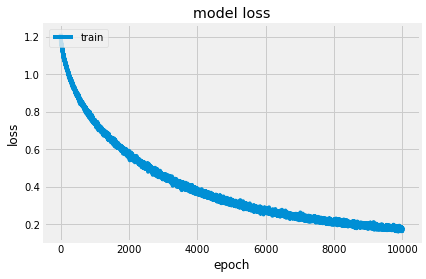

In [263]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [264]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# TRAIN PERFOMANCE

In [265]:
y_predtrain = model.predict_classes(X_train_one,verbose=0)
y_pred_t = y_predtrain
print("precision :" + str(precision_score(np.argmax(y_train_one,axis=1), y_pred_t,average='weighted')))
print("Recall :" +  str(recall_score(np.argmax(y_train_one,axis=1), y_pred_t,average='weighted')))
print("F1 :" +  str(f1_score(np.argmax(y_train_one,axis=1), y_pred_t,average='weighted')))
print("Acc :" +  str(accuracy_score(np.argmax(y_train_one,axis=1), y_pred_t)))
tnr_train= recall_score(np.argmax(y_train_one,axis=1), y_pred_t,pos_label = 0,average='weighted')
fpr_train = 1 - tnr_train
print("FPR :" +  str(fpr_train))

precision :0.9990217737051029
Recall :0.9990210474791973
F1 :0.9990210509198184
Acc :0.9990210474791973
FPR :0.0009789525208027117


# Test Performance

In [266]:
y_predtest = model.predict_classes(X_test_one,verbose=0)
y_pred_test = y_predtest
print("precision :" + str(precision_score(np.argmax(y_test_one,axis=1),y_pred_test,average='weighted')))
print("Recall :" +  str(recall_score(np.argmax(y_test_one,axis=1), y_pred_test,average='weighted')))
print("F1 :" +  str(f1_score(np.argmax(y_test_one,axis=1), y_pred_test,average='weighted')))
print("Acc :" +  str(accuracy_score(np.argmax(y_test_one,axis=1), y_pred_test)))
tnr_test= recall_score(np.argmax(y_test_one,axis=1), y_pred_test,pos_label = 0,average='weighted')
fpr_test = 1 - tnr_test
print("FPR :" +  str(fpr_test))

precision :0.710289800313994
Recall :0.7100456621004566
F1 :0.7099010520493501
Acc :0.7100456621004566
FPR :0.2899543378995434


# Save Model

In [236]:
from keras.models import model_from_json

In [267]:
model_json = model.to_json()
with open("sound_model.v2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("sound_model.v2.h5")
print("Saved model to disk")

Saved model to disk
